<a href="https://colab.research.google.com/github/SyahrulBhudiF/PCVK_GANJIL_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 3 – Operasi Citra Sederhana – Linier Brightness, Contrast,Inverse, Logarithmic Brightness, dan Grayscale Image**
1. Akses folder drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna

 Mengubah tingkat kecerahan citra 
--------------------------------
Masukkan nilai kecerahan: 10


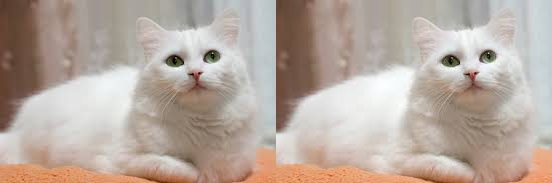

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('--------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    exit()

# Baca gambar
original = cv2.imread('/content/drive/MyDrive/pcvk/download.jpeg')

if original is None:
    print("Error: Tidak dapat membaca gambar. Periksa path file.")
    exit()

# Cara simpel tanpa for-loop
brightness_image = cv2.convertScaleAbs(original, beta=brightness)

# Gabungkan gambar asli dan hasil secara horizontal
final_frame = cv2.hconcat([original, brightness_image])

# Tampilkan gambar menggunakan cv2_imshow
cv2_imshow(final_frame)

**Tugas Praktikum**
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

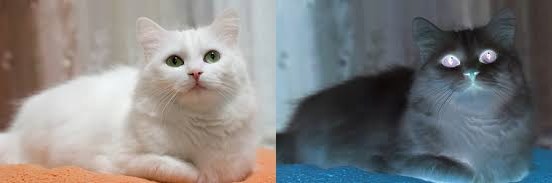

In [13]:
inverse_image = 255 - original
final_frame = cv2.hconcat([original, inverse_image])
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah tingkat kontrast citra 
--------------------------------
Masukkan nilai kontras: 3


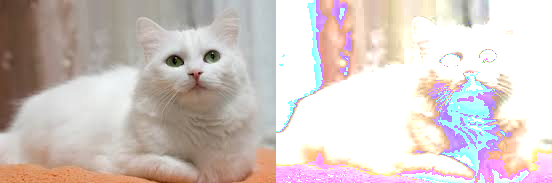

In [14]:
print(' Mengubah tingkat kontrast citra ')
print('--------------------------------')
try:
  alpha = float(input('Masukkan nilai kontras: '))
except ValueError:
  print('Error, not a number')
  exit()

contrast_image = np.clip(alpha * (original - 128) + 128, 0, 255).astype(np.uint8)
final_frame = cv2.hconcat([original, contrast_image])
cv2_imshow(final_frame)

3.  Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


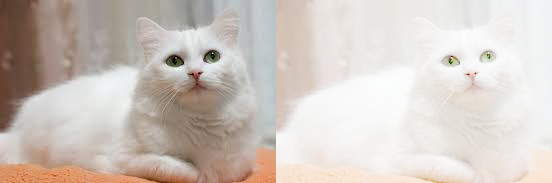

In [15]:
# Parameters for logarithmic brightness adjustment
c = 255 / np.log(1 + np.max(original))

log_image = c * np.log1p(original)

log_image = np.clip(log_image, 0, 255).astype(np.uint8)
final_frame = cv2.hconcat([original, log_image])
cv2_imshow(final_frame)

Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:



In [16]:
# Separate the channels
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
R, G, B = original[:,:,0], original[:,:,1], original[:,:,2]

a. Averaging

In [17]:
grayscale_avg = (R + G + B) / 3

b. Lightness

In [18]:
grayscale_lightness = (np.max(original, axis=2) + np.min(original, axis=2)) / 2

c. Luminance

In [19]:
grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B

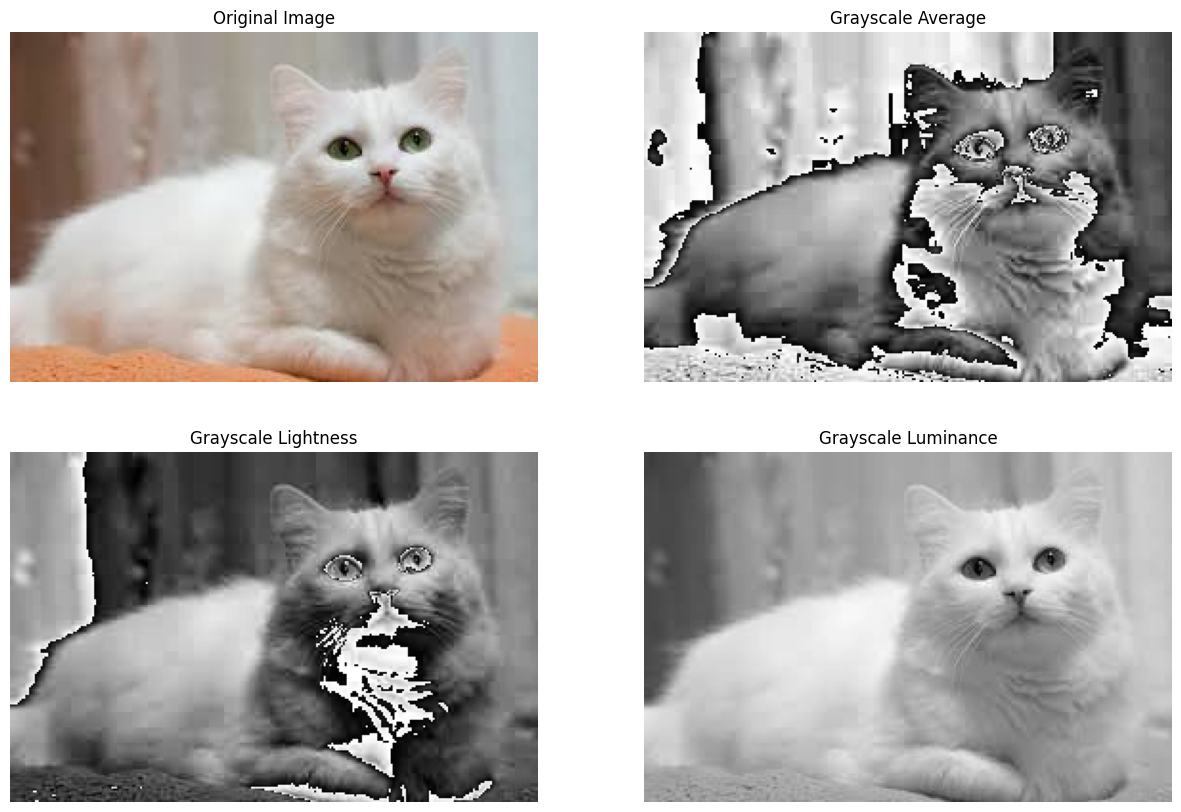

In [20]:
import matplotlib.pyplot as plt

# Display the original and grayscale images
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(original)
plt.axis('off')

# Grayscale Average
plt.subplot(2, 2, 2)
plt.title('Grayscale Average')
plt.imshow(grayscale_avg, cmap='gray')
plt.axis('off')

# Grayscale Lightness
plt.subplot(2, 2, 3)
plt.title('Grayscale Lightness')
plt.imshow(grayscale_lightness, cmap='gray')
plt.axis('off')

# Grayscale Luminance
plt.subplot(2, 2, 4)
plt.title('Grayscale Luminance')
plt.imshow(grayscale_luminance, cmap='gray')
plt.axis('off')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

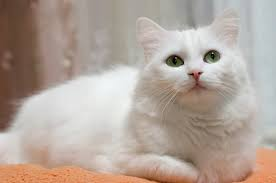

In [26]:
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
cv2_imshow(original)

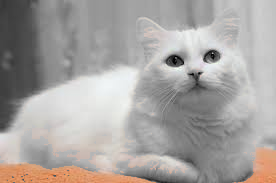

In [37]:
# Define color range for color (RGB format)
lower_bound = np.array([0, 100, 200], dtype=np.uint8)
upper_bound = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask for the blue color range
color_mask = cv2.inRange(original, lower_bound, upper_bound)

# gray image
gray_image = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

image = np.zeros_like(original)
image[color_mask != 0] = original[color_mask != 0]
image[color_mask == 0] = gray_image[color_mask == 0]

cv2_imshow(image)